In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

#### Read the dataset

In [6]:
df=pd.read_csv("../data/raw/HateSpeechDataset.csv")
df.head()

,Content,Label,Content_int
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,..."
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22..."
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,..."
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,..."
4,afro american basho,1,"[146715, 46, 47, 48, 146714]"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440906 entries, 0 to 440905
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Content      440906 non-null  object
 1   Label        440906 non-null  object
 2   Content_int  440906 non-null  object
dtypes: object(3)
memory usage: 10.1+ MB


In [8]:
df.isnull().sum()

Content        0
Label          0
Content_int    0
dtype: int64

<Axes: xlabel='Label', ylabel='count'>

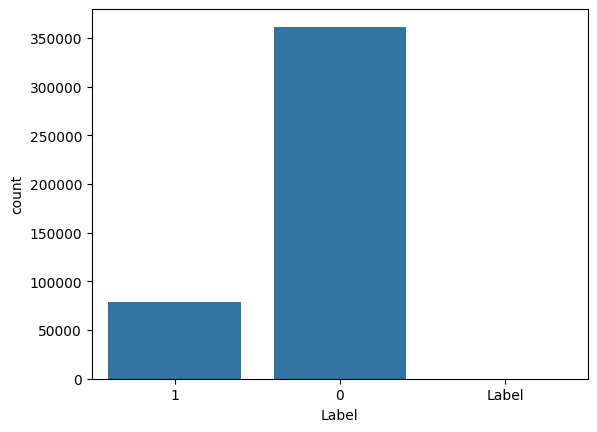

In [9]:
sns.countplot(x=df["Label"])

In [10]:
df["Label"].unique()

array(['1', '0', 'Label'], dtype=object)

In [11]:
df = df[df["Label"] != 'Label']

In [13]:
df["Label"].unique()

array(['1', '0'], dtype=object)

In [14]:
df["Label"]=df["Label"].astype(int)

In [16]:
tqdm.pandas()

In [ ]:
df["text length"]=df["Content"].astype(str).progress_apply(len) # type: ignore

100%|██████████| 440899/440899 [00:00<00:00, 1075369.44it/s]


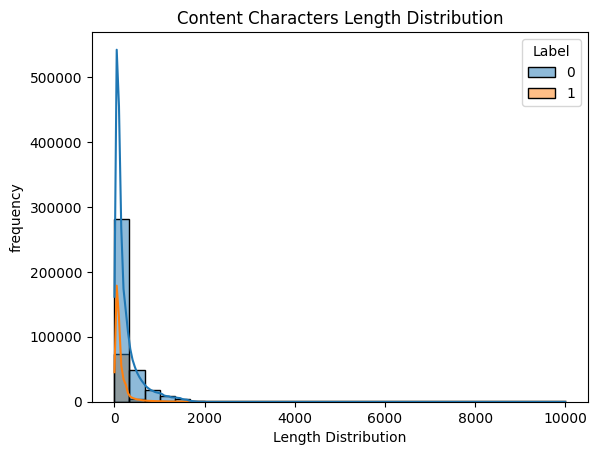

In [31]:
sns.histplot(x="text length",data=df,hue="Label",kde=True,bins=30)
plt.title("Content Characters Length Distribution")
plt.xlabel("Length Distribution")
plt.ylabel("frequency")
plt.show()

Most content is short, with the majority of samples under 1000 characters (or words), and very few above 2000–3000.

In [32]:
df["Wordlength"]=df["Content"].astype(str).progress_apply(lambda x: len(x.split(" "))) # type: ignore

100%|██████████| 440899/440899 [00:01<00:00, 268053.43it/s]


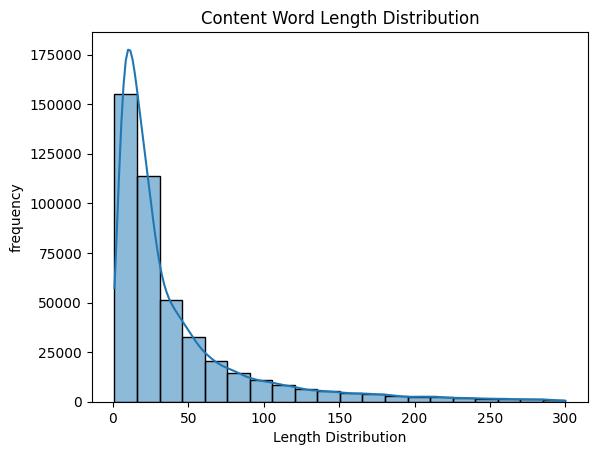

In [37]:
sns.histplot(x=df["Wordlength"],kde=True,bins=20)
plt.title("Content Word Length Distribution")
plt.xlabel("Length Distribution")
plt.ylabel("frequency")
plt.show()

Most of sentences contain words between 15 to 50 and very contain more than 50 words

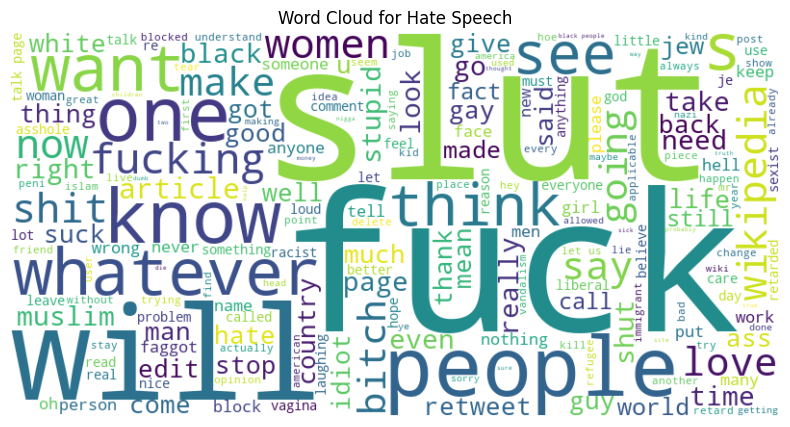

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

hate_text = " ".join(df[df['Label'] == 1]['Content'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hate_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Hate Speech")
plt.show()


In [ ]:
from nltk.corpus import stopwords
import string

df["cleaned"] = df["Content"].astype(str).progress_apply(lambda x: x.lower().strip())# type: ignore

df["cleaned"] = df["cleaned"].progress_apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

stop_words = set(stopwords.words("english"))
df["cleaned"] = df["cleaned"].progress_apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


100%|██████████| 440899/440899 [00:03<00:00, 129966.62it/s]


In [45]:
words=df["cleaned"].progress_apply(lambda x: x.split())

  0%|          | 0/440899 [00:00<?, ?it/s]

100%|██████████| 440899/440899 [00:02<00:00, 153361.36it/s]


In [46]:
flat_words = [word for sublist in words for word in sublist]

In [48]:
from collections import Counter

word_frequency=Counter(flat_words)

print(word_frequency.most_common(20))

[('article', 87022), ('slut', 83245), ('page', 70018), ('would', 57583), ('wikipedia', 57238), ('like', 54968), ('one', 49067), ('please', 48912), ('whatever', 45228), ('talk', 43674), ('see', 40786), ('people', 39671), ('think', 36607), ('know', 34682), ('also', 30543), ('get', 28179), ('time', 26842), ('edit', 26831), ('use', 26059), ('good', 24494)]


These are most 20 common words in whole dataset

In [49]:
hate_words=df[df["Label"]==1]["cleaned"].progress_apply(lambda x: x.split())

100%|██████████| 79305/79305 [00:00<00:00, 164437.50it/s]


In [50]:
hate_flat_words = [word for sublist in hate_words for word in sublist]

In [51]:
hate_words_frequency=Counter(hate_flat_words)

print(hate_words_frequency.most_common(20))

[('like', 9216), ('people', 8758), ('fuck', 8638), ('fucking', 6638), ('slut', 6482), ('get', 5990), ('whatever', 5341), ('see', 5186), ('would', 4791), ('one', 4789), ('know', 4695), ('go', 4605), ('women', 4286), ('think', 4273), ('wikipedia', 4064), ('want', 3960), ('bitch', 3832), ('shit', 3814), ('black', 3563), ('stop', 3238)]


These are 20 most frequent words in hate speech